#### Vamos ver na prática o uso de **regressão linear** para o problema de predição de preço de casas de Portland, RO
**obs:** código desenvolvido para a [Jornada Academica da Escola Politécnica, PUCRS](https://politecnica.pucrs.br/semana-academica/inscricoes/), 

06/10/2022, Adilson Medronha



## Imports

In [1]:
from os.path import exists 
from os import mkdir as mk
from os import listdir 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import imageio

### Funcoes auxiliares

In [2]:
def grafico_ajuste(X, y, predicao, custo, iteracao, path, pesos):
        w, b = pesos
        custo_txt = f'custo = {custo:.8f}'
        modelo_text = f'modelo = {b.item():.2f} + {w.item():.2f}x'
        
        plt.plot(X, y, 'x')
        plt.plot(X, predicao, 'r')
        plt.text(-1, 1.8, custo_txt, fontsize = 10)
        plt.text(-1, 2.2, modelo_text, fontsize = 10)
        plt.text(-1, 2.6, "iteracao = " + str(iteracao), fontsize = 10)
        plt.savefig(path+str(iteracao)+".png")

        plt.close()

def grafico_convergencia(custo, iteracoes):
        plt.plot(iteracoes, custo)
        plt.xlabel("Iteracoes")
        plt.ylabel("Custo")    
        plt.show()

def criar_gif(path):
        images = []
        path_files = sorted(listdir(path), key=lambda fname: int(fname.split('.')[0]))
        for filename in path_files:
            images.append(imageio.imread(path + "/" + filename))
        imageio.mimsave('learning.gif', images)


In [3]:
path = "/content/ajuste_gradiente/"
if not exists(path):
        mk(path)

FileNotFoundError: [WinError 3] O sistema não pode encontrar o caminho especificado: '/content/ajuste_gradiente/'

## Dados

In [ ]:
dataset  = '''2104,399900
1600,329900
2400,369000
1416,232000
3000,539900
1985,299900
1534,314900
1427,198999
1380,212000
1494,242500
1940,239999
2000,347000
1890,329999
4478,699900
1268,259900
2300,449900
1320,299900
1236,199900
2609,499998
3031,599000
1767,252900
1888,255000
1604,242900
1962,259900
3890,573900
1100,249900
1458,464500
2526,469000
2200,475000
2637,299900
1839,349900
1000,169900
2040,314900
3137,579900
1811,285900
1437,249900
1239,229900
2132,345000
4215,549000
2162,287000
1664,368500
2238,329900
2567,314000
1200,299000
852,179900
1852,299900
1203,239500'''

open("portland_dataset.txt","w").write(dataset)

562

In [ ]:
dataset = pd.read_csv("portland_dataset.txt", header=None)
dataset.columns = ["X", "y"]
dataset.describe()

,X,y
count,47.000000,47.000000
mean,2000.680851,340412.659574
std,794.702354,125039.899586
min,852.000000,169900.000000
25%,1432.000000,249900.000000
50%,1888.000000,299900.000000
75%,2269.000000,384450.000000
max,4478.000000,699900.000000


## Modelo

In [ ]:
class RegressaoLinear():
    def __init__(self, X, y, lr, epochs):
        self.X = X
        self.y = y
        self.lr = lr

        self.m, self.n = self.X.shape
        self.epochs = epochs 
        self.w = np.zeros((self.n,1))
        self.b = 0

    def predict(self, X):
      # f(x) = wx + b
        return np.dot(X, self.w) + self.b
    
    def gradiente(self, pred):
        erro = pred - self.y
        dw = (1 / self.n) * np.dot(self.X.T, erro) # derivada em relação a w
        db = (1 / self.n) * np.sum(erro) # derivada em relação a b
        return dw, db
    
    def sol_analitica(self):
        # dever de casa
        pass
    
    def MSE(self, pred):
        return np.sum((pred - self.y)**2) / self.m

    def GD(self):
        custo_total = []
        for iteracao in tqdm(range(self.epochs), desc = f'tempo de treinamento'):
            pred   = self.predict(self.X)
            dw, db = self.gradiente(pred)
            self.w = self.w - self.lr * dw
            self.b = self.b - self.lr * db

            custo = self.MSE(pred)
            custo_total.append(custo)

            grafico_ajuste(self.X, self.y, pred, custo, iteracao, path, pesos=[self.w, self.b])
            
        grafico_convergencia(custo_total, range(self.epochs))
        criar_gif(path)

## Main

In [ ]:
X, y =  dataset.X.values.reshape(-1,1), dataset.y.values.reshape(-1,1)
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tempo de treinamento: 100%|██████████| 100/100 [00:08<00:00, 12.13it/s]


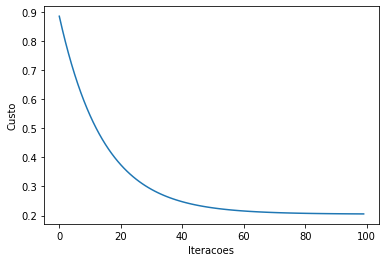

In [ ]:
model = RegressaoLinear(X_train, y_train, lr=0.001, epochs=100) # epochs são os rounds posso botar maior pra treinar mais e passar do modelo do sklearn
model.GD()

#  **Comparando: será que nosso modelo aprendeu os mesmos parâmetros que o SKLEARN?**

In [ ]:
# SKLEARN
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)
print("Coeficiente: ", model_sklearn.coef_)
print("Intercepto: ",  model_sklearn.intercept_)

Coeficiente:  [[0.85392077]]
Intercepto:  [-0.09567163]


In [ ]:
# NOSSO MODELO
print("Coeficiente: ", model.w)
print("Intercepto: ",  model.b)

Coeficiente:  [[0.82602402]]
Intercepto:  -0.09807584253130439


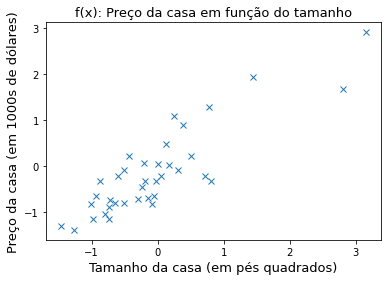

In [ ]:
plt.plot(X_train, y_train, 'x')
plt.xlabel("Tamanho da casa (em pés quadrados)", fontsize=13)
plt.ylabel("Preço da casa (em 1000s de dólares)", fontsize=13)
plt.title("f(x): Preço da casa em função do tamanho", fontsize=13)
plt.savefig("regressao_linear.png")

In [ ]:
from IPython.display import Image
Image(filename="learning.gif")

Output hidden; open in https://colab.research.google.com to view.

## Dever de casa
### Computar essas métricas


In [ ]:
def MSE():
  pass

def RMSE():
  pass

def MAE():
  pass

In [ ]:
y_pred = model.predict(y_test)

In [ ]:
# GABARITO
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

# quanto menor, melhor. Se zero, modelo perfeito
print("Erro Quadratico Medio =", MSE(y_pred, y_test))
print("Erro Medio Absoluto =",  MAE(y_pred, y_test))